In [14]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [15]:
n = 100

# label a
mA = [5, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[5.15287845, 4.59958386, 4.98052292, 4.61199399, 5.36476666],
        [2.31293723, 1.74945999, 2.53988286, 2.14434044, 1.33018788],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]))

In [16]:
# label b
mB = [7, 3]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[7.17173405, 8.22855343, 6.86869507, 7.31280326, 7.27845211],
        [3.4747853 , 3.4383319 , 3.65510389, 3.55180114, 2.63730651],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]))

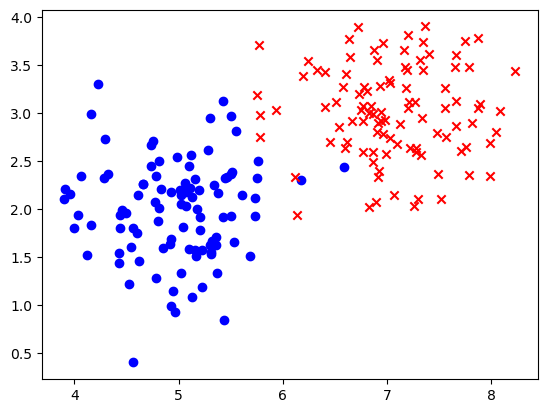

In [17]:
import matplotlib.pyplot as plt
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

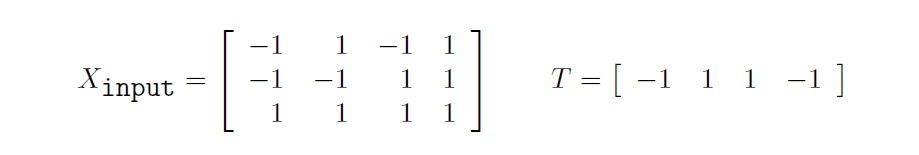

In [18]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[5.15287845, 4.59958386, 4.98052292, 4.61199399, 5.36476666],
        [2.31293723, 1.74945999, 2.53988286, 2.14434044, 1.33018788],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 (3, 200))

In [19]:
dataset

array([[5.15287845, 4.59958386, 4.98052292, 4.61199399, 5.36476666,
        3.90428943, 4.92335432, 4.32626343, 4.03708591, 5.42161927,
        5.73206936, 3.91432651, 5.44749138, 4.4349847 , 4.92943336,
        5.30312682, 5.32412231, 4.43170697, 4.49392544, 5.55244369,
        4.52799268, 5.37294781, 4.76987244, 5.02333388, 5.10131167,
        4.82858331, 5.0665387 , 4.78582819, 4.91763075, 4.84922946,
        4.81213224, 5.53514348, 5.60466999, 5.68424058, 5.30685205,
        4.42717214, 4.56038607, 5.49855259, 4.4600901 , 4.15586964,
        3.96068579, 5.27823612, 5.11354024, 5.49975245, 5.20867868,
        4.56254566, 4.1550568 , 4.66259859, 5.07334235, 5.05806308,
        3.99823179, 4.73811773, 4.27956071, 5.75347274, 4.93036883,
        5.35544953, 4.94301167, 5.12386266, 4.96981824, 5.43450028,
        6.17672009, 4.66232399, 5.06590512, 4.5450989 , 5.03936188,
        5.42789003, 4.11782072, 5.01207209, 5.22745166, 4.22983775,
        4.79957674, 5.31070177, 5.51381837, 5.02

In [20]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[5.46338594, 7.55218227, 4.4349847 , 7.27845211, 5.49855259],
       [2.33735234, 3.05730653, 1.79792495, 2.63730651, 1.92478884],
       [0.        , 1.        , 0.        , 1.        , 0.        ]])

In [21]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [5.46338594, 7.55218227, 4.4349847 , 7.27845211, 5.49855259],
        [2.33735234, 3.05730653, 1.79792495, 2.63730651, 1.92478884],
        [0.        , 1.        , 0.        , 1.        , 0.        ]]))

In [22]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

In [23]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for i in range(0, n_epochs):
                predictions = self.predict(X)
                e = y_train - predictions
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                nErrors = np.sum( np.array(e != 0, dtype=int) )
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
            return False
                

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            dW = self.learning_rate * (e * X[:,i])
            self.W = self.W + dW
        print("Errors this epoch:" + str(nErrors))

In [24]:
p1 = PerceptronLearningClassifier(0.1)

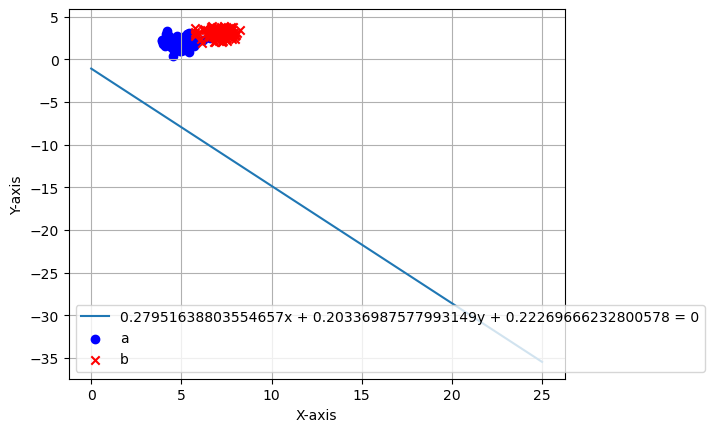

[0.22269666 0.27951639 0.20336988]


In [25]:
x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

After 0 epochs: 100 errors
After 1 epochs: 100 errors
After 2 epochs: 100 errors
After 3 epochs: 100 errors
After 4 epochs: 100 errors
After 5 epochs: 100 errors
After 6 epochs: 100 errors
After 7 epochs: 100 errors
After 8 epochs: 100 errors
After 9 epochs: 100 errors
After 10 epochs: 100 errors
After 11 epochs: 100 errors
After 12 epochs: 100 errors
After 13 epochs: 100 errors
After 14 epochs: 100 errors
After 15 epochs: 100 errors
After 16 epochs: 100 errors
After 17 epochs: 100 errors
After 18 epochs: 100 errors
After 19 epochs: 100 errors
After 20 epochs: 100 errors
After 21 epochs: 100 errors
After 22 epochs: 100 errors
After 23 epochs: 100 errors
After 24 epochs: 100 errors
After 25 epochs: 100 errors
After 26 epochs: 100 errors
After 27 epochs: 100 errors
After 28 epochs: 100 errors
After 29 epochs: 50 errors
After 30 epochs: 100 errors
After 31 epochs: 100 errors
After 32 epochs: 52 errors
After 33 epochs: 100 errors
After 34 epochs: 100 errors
After 35 epochs: 100 errors
Afte

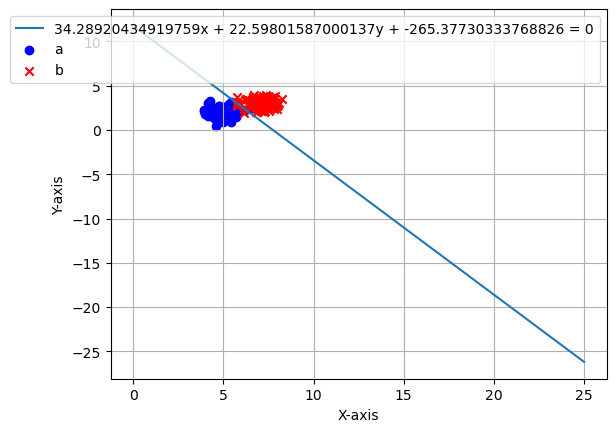

[-265.37730334   34.28920435   22.59801587]


In [26]:
while (p1.fit(X_train, y_train, 1) == False):
    if (p1.epochs > 5000):
        print("No convergence after 5000 epochs...")
        break
    pass

x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

------------